In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

# Load dataset
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

# Convert to DataFrame
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [2]:
# Check for missing values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


Observation:
The Diabetes dataset does not contain missing values, so no imputation is required.

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**EDA**

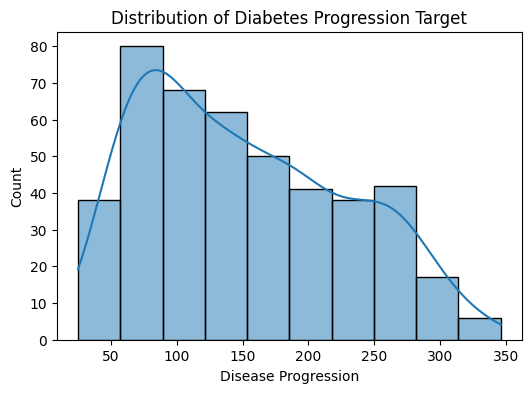

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(y, kde=True)
plt.title("Distribution of Diabetes Progression Target")
plt.xlabel("Disease Progression")
plt.show()

**Distribution of Diabetes Progression Target**

The histogram with kernel density estimation (KDE) shows the distribution of the diabetes progression target variable.

Observations:

The target values are approximately normally distributed with a slight right skew.

Most patient records fall in the moderate disease progression range (around 80–200).

Fewer samples are present at very low and very high progression values.

Inference:

Since the target variable follows a near-normal distribution, it is well suited for regression-based models, including Artificial Neural Networks.

The absence of extreme outliers helps improve stable training and prediction performance. **The target variable shows an approximately normal distribution, making it suitable for ANN-based regression modeling.**

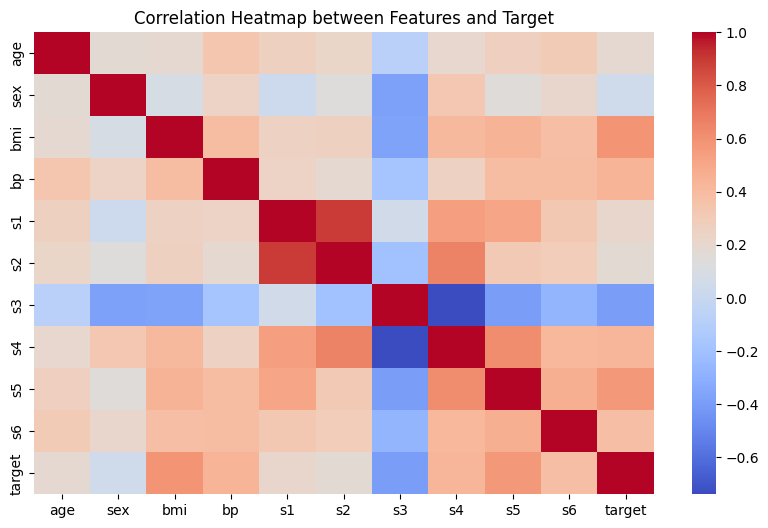

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap between Features and Target")
plt.show()

**Correlation Heatmap  Interpretation**

The correlation heatmap illustrates the linear relationship between the input features and the diabetes progression target variable.

Key Observations:

BMI shows a strong positive correlation with the target variable, indicating that higher body mass index is strongly associated with increased diabetes progression.

S5 (serum triglycerides) and S4 also exhibit moderate to strong positive correlations with the target.

Blood pressure (bp) shows a moderate correlation, suggesting its influence on disease progression.

Age and sex have relatively weak correlations with the target variable.

S3 shows a negative correlation with the target, indicating an inverse relationship.

Some serum features are strongly correlated among themselves, reflecting biological interdependence.

Inference:

Diabetes progression depends on multiple interacting clinical variables, not a single factor.

The presence of both positive and negative correlations suggests non-linear relationships, making Artificial Neural Networks suitable for modeling this problem.
**BMI, serum measures (S4, S5), and blood pressure show stronger correlation with diabetes progression, justifying the use of an ANN to capture complex relationships.**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dense(1)
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [8]:
model.compile(
    optimizer='adam',
    loss='mse'
)

In [9]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 30819.1113 - val_loss: 27282.5410
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27550.0625 - val_loss: 27162.7422
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26940.8613 - val_loss: 27034.3438
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28785.1543 - val_loss: 26899.3535
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27850.9746 - val_loss: 26753.7852
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28538.6465 - val_loss: 26597.1270
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28602.0801 - val_loss: 26425.2773
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27321.3203 - val_loss: 26240.3652
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27451.0801 - val_loss: 26037.2012
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24710.5625 - val_loss: 25816.9688
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26625.34

In [10]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 


In [11]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

Mean Squared Error (MSE): 4737.065881254104
R2 Score: 0.10590218889438041


Model Evaluation – Result Interpretation

Mean Squared Error (MSE): 4737.07
This indicates the average squared difference between the predicted and actual diabetes progression values.

R² Score: 0.1059
The model explains approximately 10.6% of the variance in diabetes progression on unseen test data.

Inference:

The baseline ANN model captures some underlying patterns but has limited explanatory power.

The relatively low R² score suggests that the model can be further improved by:

Increasing network depth

Tuning hyperparameters

Using regularization **The baseline ANN achieved an MSE of 4737.07 and an R² score of 0.1059, indicating scope for further performance improvement.**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

improved_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

improved_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)

improved_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

Changes Made to the Model

Increased network depth
→ Added an additional hidden layer to capture more complex patterns.

Increased number of neurons
→ Allows the model to learn richer feature representations.

Introduced Dropout regularization
→ Reduces overfitting by randomly deactivating neurons during training.

Adjusted training duration
→ Increased number of epochs for better convergence.

In [13]:
improved_model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 30917.8320 - val_loss: 27233.8574
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29025.5449 - val_loss: 26816.3848
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28810.2324 - val_loss: 26199.9648
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29098.7402 - val_loss: 25255.2910
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27578.4863 - val_loss: 23895.7051
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26309.4941 - val_loss: 21999.7285
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20994.4707 - val_loss: 19546.2676
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18221.1211 - val_loss: 16665.6367
Epoch 9/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13554.5264 - val_loss: 13737.1064
Epoch 10/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10921.5088 - val_loss: 11007.5898
Epoch 11/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8751.366

In [14]:
y_pred_improved = improved_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)

print("Improved MSE:", mse_improved)
print("Improved R2 Score:", r2_improved)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Improved MSE: 2722.3259903585868
Improved R2 Score: 0.4861744020222156


| Model        | MSE         | R² Score   |
| ------------ | ----------- | ---------- |
| Basic ANN    | 4737.07     | 0.1059     |
| Improved ANN | **2722.33** | **0.4862** |


Interpretation

The MSE reduced significantly from 4737.07 to 2722.33, indicating much lower prediction error.

The R² score increased from 0.1059 to 0.4862, meaning the improved model explains nearly 49% of the variance in diabetes progression.

Adding an extra hidden layer, increasing neurons, and applying dropout helped the model capture complex non-linear relationships more effectively.

The improved ANN demonstrates better generalization and predictive performance.**The improved ANN significantly outperformed the baseline model, reducing MSE and increasing the R² score to 0.486, demonstrating effective model optimization.**